## Firmata

- Install firmdata (pip)
- Upload firmdata to Arduino
    - File -> Examples -> Firmdata -> StandardFirmdata

In [ ]:
import pyfirmata
import time

board = pyfirmata.Arduino('<port_name>')
it = pyfirmata.util.Iterator(board)
it.start()

digital_input = board.get_pin('d:10:i')
analog_input = board.get_pin('a:0:i')
led = board.get_pin('d:13:o')

tm = time.time()
while time.time() - tm < 20:
    led.write(1)
    time.sleep(1)
    led.write(0)
    time.sleep(1)
    analog_value = analog_input.read()
    print(analog_value)

## IDEA

In [1]:
import pyfirmata, time, matplotlib.pyplot as plt, numpy as np 

In [20]:
board = pyfirmata.Arduino('COM3')
it = pyfirmata.util.Iterator(board)
it.start() 

In [21]:
thermistor = board.get_pin('a:0:i') 
thermocouple = board.get_pin('a:1:i')

In [32]:
res = 9.92 

In [33]:
values = []
tm = time.time()
while time.time() - tm < 10:
    values.append([time.time()-tm,res * (1/thermistor.read()-1),thermocouple.read()])
    time.sleep(0.1)
vals = np.array(values)

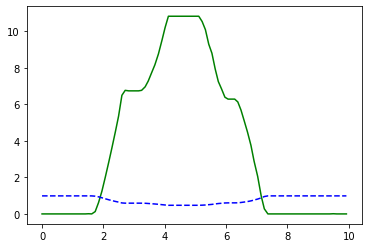

In [34]:
plt.plot(vals[:,0],vals[:,1],'g-',vals[:,0],vals[:,2],'b--')

In [36]:
min(vals[:,1])

0.0

In [19]:
board.exit()

## meh

In [8]:
values = [
    [1,1],
    [3,9],
    [5,25],
    [7,49],
    [9,81]
]

In [11]:
x = np.linspace(1,9,200)
y = x*x

In [17]:
import matplotlib.pyplot as plt 

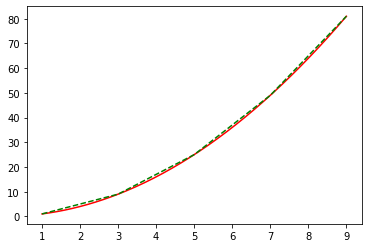

In [28]:
plt.plot(x,y,'r-',vals[:,0],vals[:,1],'g--')

In [1]:
import keyboard, time as t

In [2]:
# from os import mkdir
# mkdir('img')

In [3]:
import cv2
vidcap = cv2.VideoCapture('vid.mp4')
success,image = vidcap.read()
count = 0
while success:
    if not count%30:
        cv2.imwrite("img/frame{}.jpg".format(int(count/30)), image)     # save frame as JPEG file      
    success,image = vidcap.read()
    count += 1

In [5]:
vidcap.release()

In [4]:
'''
86200 23
79600 24
67200 27
57250 29
52140 32
47430 34
39300 39
36920 41
33700 44
27350 50
23730 55
21310 58
17200 65
14820 70
12870 73
11730 78
10070 83
9450 85
8500 89
7090 95
6230 99
5486 104
4739 109
4387 112
3958 115
3544 118
3121 120
2919 124
2706 128
2429 131
2213 135
2014 138
1864 140
1751 142
1565 146
1500 148
1449 150
'''

'\n86200 23\n79600 24\n67200 27\n57250 29\n52140 32\n47430 34\n39300 39\n36920 41\n33700 44\n27350 50\n23730 55\n21310 58\n17200 65\n14820 70\n12870 73\n11730 78\n10070 83\n9450 85\n8500 89\n7090 95\n6230 99\n5486 104\n4739 109\n4387 112\n3958 115\n3544 118\n3121 120\n2919 124\n2706 128\n2429 131\n2213 135\n2014 138\n1864 140\n1751 142\n1565 146\n1500 148\n1449 150\n'

## DELETE

In [177]:
n = 20

In [178]:
a = []
for i in range(n+1):
    for j in range(i+1):
        a.append((i,j))

In [179]:
thread_count = 8

In [180]:
length = int((len(a)-len(a)%thread_count)/thread_count) + 1

In [181]:
def partition(lst, size):
    for i in range(0, len(lst), size):
        yield lst[i : i+size]

In [182]:
p = list(partition(a,length))

In [74]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

    threads = list()
    for index in range(thread_count):
        logging.info("Main    : create and start thread %d.", index)
        x = threading.Thread(target=thread_function, args=(index,))
        threads.append(x)
        x.start()

    for index, thread in enumerate(threads):
        logging.info("Main    : before joining thread %d.", index)
        thread.join()
        logging.info("Main    : thread %d done", index)


18:36:44: Main    : create and start thread 0.
18:36:44: Thread 0: starting
18:36:44: Main    : create and start thread 1.
18:36:44: Thread 1: starting
18:36:44: Main    : create and start thread 2.
18:36:44: Thread 2: starting
18:36:44: Main    : before joining thread 0.
18:36:46: Thread 1: finishing
18:36:46: Thread 0: finishing
18:36:46: Thread 2: finishing
18:36:46: Main    : thread 0 done
18:36:46: Main    : before joining thread 1.
18:36:46: Main    : thread 1 done
18:36:46: Main    : before joining thread 2.
18:36:46: Main    : thread 2 done


In [190]:
sm = []
for j in p:
    sum = 0
    for i in j:
        sum += i[0]
        sum += i[1]
    sm.append(sum)

In [191]:
sm

[175, 353, 474, 572, 646, 744, 781, 875]

In [195]:
572/175

3.2685714285714287

## machine

In [5]:
import periphery

ModuleNotFoundError: No module named 'termios'

In [4]:
from importlib import reload

In [ ]:
reload